# Notebook Containing the Phylogenetic Analysis for Figure 4D and Supplementary Figure 4D
Runs a MSA, builds trees and visualizes the betaCoV dataset 

In [1]:
from Bio import Phylo
import matplotlib.pyplot as plt
import dendropy
import re

In [51]:
# Perform multiple sequence alignment using MUSCLE
!muscle -align betacoronavirus_seq.fasta -output aligned_betacoronavirus_seq.afasta


muscle 5.3.linux64 [-]  1056Gb RAM, 256 cores
Built Nov 11 2024 08:05:12
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

[align betacoronavirus_seq.fasta]
Input: 75 seqs, avg length 200, max 219, min 182

00:00 3.9Mb   100.0% Derep 66 uniques, 9 dupes
00:00 4.1Mb  CPU has 256 cores, running 256 threads
00:00 19.3Gb  100.0% Calc posteriors
00:00 19.3Gb  100.0% UPGMA5         
00:00 19.3Gb  100.0% Consistency (1/2)
00:00 19.3Gb  100.0% Consistency (2/2)
00:01 19.3Gb  100.0% Refining         


In [54]:
!iqtree -s aligned_betacoronavirus_seq.afasta -m MFP -bb 1000 -nt AUTO -redo

IQ-TREE multicore version 2.4.0 for Linux x86 64-bit built Feb 12 2025
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    bio-lambda01.lanl.gov (AVX2, FMA3, 1007 GB RAM)
Command: iqtree -s aligned_betacoronavirus_seq.afasta -m MFP -bb 1000 -nt AUTO -redo
Seed:    642491 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Tue May 27 19:15:37 2025
Kernel:  AVX+FMA - auto-detect threads (256 CPU cores detected)

Reading alignment file aligned_betacoronavirus_seq.afasta ... Fasta format detected
Reading fasta file: done in 0.000311074 secs
Alignment most likely contains protein sequences
Alignment has 75 sequences with 230 columns, 210 distinct patterns
174 parsimony-informative, 14 singleton sites, 42 constant sites
                                        Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 0.00712556 secs using 2.296e+04% CPU
   1  ALJ54518.1_MERS

In [55]:
# Cleans up labels

with open("/data/spike_ml/Spike_NLP-Lightning_martha/Spike_NLP-Lightning/notebooks/phylogenetic_analysis/aligned_betacoronavirus_seq.afasta.contree", "r") as infile:
    tree = infile.read()

# Remove everything inside square brackets
clean_tree = re.sub(r'\[.*?\]', '', tree)

with open("/data/spike_ml/Spike_NLP-Lightning_martha/Spike_NLP-Lightning/notebooks/phylogenetic_analysis/aligned_betacoronavirus_seq.afasta.nwk", "w") as outfile:
    outfile.write(clean_tree)

In [57]:
# Uses dentropy to midpoint root the tree

tree = dendropy.Tree.get(path="/data/spike_ml/Spike_NLP-Lightning_martha/Spike_NLP-Lightning/notebooks/phylogenetic_analysis/aligned_betacoronavirus_seq.afasta.nwk", schema="newick")
tree.reroot_at_midpoint()
tree.write(path="/data/spike_ml/Spike_NLP-Lightning_martha/Spike_NLP-Lightning/notebooks/phylogenetic_analysis/midpoint_root_aligned_betacoronavirus_seq.afasta.nwk", schema="newick")

In [2]:
# Load the rpy2 extenstion for ggtree
%load_ext rpy2.ipython

/data/mdix_miniconda/miniconda/envs/trees_R/lib/python3.12/site-packages/rpy2/ipython/rmagic.py:74: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded (error: No module named 'pandas'), but at least we found `numpy`.
  warnings.warn('The Python package `pandas` is strongly '


In [3]:
%%R
# Set a CRAN mirror explicitly to Utah
options(repos = c(CRAN = "https://mirror.chpc.utah.edu/pub/cran/"))

# Install R packages
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager",ask = FALSE, checkBuilt = TRUE)

install.packages(c("Matrix", "MASS", "mgcv"),ask = FALSE, checkBuilt = TRUE)
install.packages("ggplot2",ask = FALSE, checkBuilt = TRUE) 

BiocManager::install("ggtree",ask = FALSE, checkBuilt = TRUE)

BiocManager::install("ggtreeExtra",ask = FALSE, checkBuilt = TRUE)

install.packages(c("ape", "dplyr", "stringr", "ggplot2"),ask = FALSE, checkBuilt = TRUE)

R[write to console]: trying URL 'https://mirror.chpc.utah.edu/pub/cran/src/contrib/mgcv_1.9-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1127049 bytes (1.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fopenmp -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c coxph.c -o coxph.o
x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-

installing to /data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/00LOCK-mgcv/00new/mgcv/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (mgcv)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpJmQdY7/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done

R[write to console]: trying URL 'https://mirror.chpc.utah.edu/pub/cran/src/contrib/ggplot2_3.5.2.tar.gz'

R[write to console]: Content 

x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Icmark -I. -DCMARK_GFM_STATIC_DEFINE -DCMARK_GFM_EXTENSIONS_STATIC_DEFINE -DR_NO_REMAP -DSTRICT_R_HEADERS  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c extensions.c -o extensions.o
x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Icmark -I. -DCMARK_GFM_STAT

installing to /data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/00LOCK-commonmark/00new/commonmark/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (commonmark)
* installing *source* package ‘ggfun’ ...
** package ‘ggfun’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a re

x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG  -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/cli/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c backports.c -o backports.o
x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG  -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/c

installing to /data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/00LOCK-purrr/00new/purrr/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (purrr)
* installing *source* package ‘Rcpp’ ...
** package ‘Rcpp’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 15.1.0-2) 15.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -I../inst/include/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib    -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c api.cpp -o api.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -I../inst/include/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdi

installing to /data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/00LOCK-Rcpp/00new/Rcpp/libs
** R
** inst
** byte-compile and prepare package for lazy loading


code for methods in class “C++OverloadedMethods” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “RcppClass” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “RcppClass” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Rcpp)
* installing *source* package ‘rprojroot’ ...
** package ‘rprojroot’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (rprojroot)
* installing *source* package ‘waldo’ ...
** package ‘waldo’ successf

** Using bundled copy of libuv
** PKG_CFLAGS=-Ilibuv/include
** PKG_LIBS=./libuv/.libs/libuv.b
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/later/include' -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdeb

** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 15.1.0-2) 15.1.0’
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 15.1.0-2) 15.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/later/include' -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c callb

In file included from gzipdatasource.cpp:1:
gzipdatasource.h:4:10: fatal error: zlib.h: No such file or directory
    4 | #include <zlib.h>
      |          ^~~~~~~~
compilation terminated.
make: *** [/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/etc/Makeconf:200: gzipdatasource.o] Error 1
ERROR: compilation failed for package ‘httpuv’
* removing ‘/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/httpuv’
* restoring previous ‘/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/httpuv’
* installing *source* package ‘shiny’ ...
** package ‘shiny’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation 

** Using bundled copy of libuv
** PKG_CFLAGS=-Ilibuv/include
** PKG_LIBS=./libuv/.libs/libuv.b
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/later/include' -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdeb

** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 15.1.0-2) 15.1.0’
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 15.1.0-2) 15.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/later/include' -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c callb

In file included from gzipdatasource.cpp:1:
gzipdatasource.h:4:10: fatal error: zlib.h: No such file or directory
    4 | #include <zlib.h>
      |          ^~~~~~~~
compilation terminated.
make: *** [/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/etc/Makeconf:200: gzipdatasource.o] Error 1
ERROR: compilation failed for package ‘httpuv’
* removing ‘/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/httpuv’
* restoring previous ‘/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/httpuv’
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpJmQdY7/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done



x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/later/include' -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib   -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c gzipd

R[write to console]: trying URL 'https://mirror.chpc.utah.edu/pub/cran/src/contrib/ape_5.8-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1424541 bytes (1.4 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG  -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c BIONJ.c -o BIONJ.o
x86_64-conda-linux-gnu-cc -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG  -I'/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/Rcpp/include' -DNDEBUG -D_F

installing to /data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/00LOCK-ape/00new/ape/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ape)
* installing *source* package ‘dplyr’ ...
** package ‘dplyr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 15.1.0-2) 15.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -I/data/mdix_miniconda/miniconda/envs/trees_R/include -Wl,-rpath-link,/data/mdix_miniconda/miniconda/envs/trees_R/lib    -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /data/mdix_miniconda/miniconda/envs/trees_R/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1734346517311/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/data/mdix_miniconda/miniconda/envs/trees_R=/usr/local/src/conda-prefix  -c chop.cpp -o chop.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/data/mdix_miniconda/miniconda/envs/trees_R/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /data/mdix_miniconda/miniconda/envs/trees_R

installing to /data/mdix_miniconda/miniconda/envs/trees_R/lib/R/library/00LOCK-dplyr/00new/dplyr/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (dplyr)
* installing *source* package ‘stringr’ ...
** package ‘stringr’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package

In [26]:
# Set Path to Tree File to Pass to R
tree_path = "/data/spike_ml/Spike_NLP-Lightning_martha/Spike_NLP-Lightning/notebooks/phylogenetic_analysis/midpoint_root_aligned_betacoronavirus_seq.afasta.nwk"
hdb_scan_clusters = "betacov_clustering_v2.csv"
hdb_scan_clusters_non_finetuned = "betacov_clustering_suppl4_v2.csv"

In [27]:
# Pass the paths to R
%R -i tree_path
%R -i hdb_scan_clusters
%R -i hdb_scan_clusters_non_finetuned

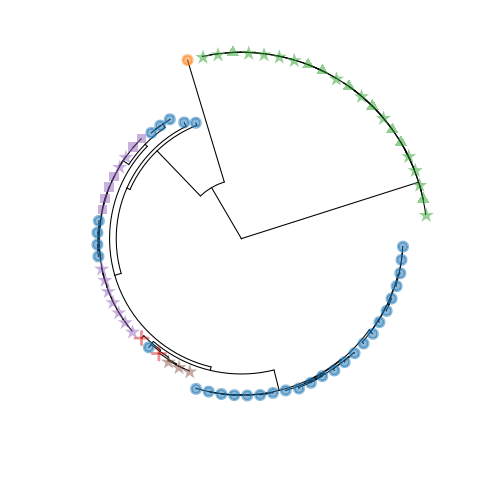

In [18]:
%%R

# Create circular tree for figure 4D

library(ggtree)
library(ape)
library(dplyr)
library(stringr)
library(ggplot2)

# Load tree
tree <- read.tree(tree_path)

# Extract tip labels
tip_labels <- tree$tip.label


# Build metadata for each tip
tip_metadata <- data.frame(label = tip_labels) %>%
  mutate(
    color_group = case_when(
      str_detect(label, "Hibecovirus") ~ "#ff7f0e",
      str_detect(label, "Pangolin") ~ "#d62728",
      str_detect(label, "MERS") ~ "#2ca02c",
      str_detect(label, "Bat-Virus") ~ "#1f77b4",
      str_detect(label, fixed("Sars-Cov-1")) ~ "#9467bd",
      str_detect(label, fixed("Sars-Cov-2")) ~ "#8c564b",
      TRUE ~ "gray"
    ),
    shape_group = case_when(
      str_detect(label, "Bat") ~ "circle",
      str_detect(label, "Camel") ~ "triangle",
      str_detect(label, "Civet") ~ "square",
      str_detect(label, "Pangolin") ~ "plus",
      TRUE ~ "star"
    ),
    shape = case_when(
      shape_group == "square" ~ 15,    # square
      shape_group == "triangle" ~ 17,  # triangle
      shape_group == "circle" ~ 19,  # circle
      shape_group == "plus" ~ 3,  # plus
      TRUE ~ NA_real_                     # star
    ),
    # Add Unicode stars as text labels
    star_label = ifelse(shape_group == "star", "\u2605", "")
  )


# Plot circular tree
p <- ggtree(tree, layout = "circular") %<+% tip_metadata +
  geom_tippoint(aes(color = color_group, shape = shape), size = 3, stroke = 2, alpha = 0.5) +
  geom_text(aes(label = star_label, color = color_group), size = 6, fontface = "bold", na.rm = TRUE, alpha = 0.5) +
  scale_color_identity() + 
  scale_shape_identity() + 
  theme(text = element_text(family = "Arial Unicode MS"))


print(p)

ggsave("Circular_Tree.pdf", plot = p, width = 10, height = 8, dpi = 600, device = cairo_pdf)

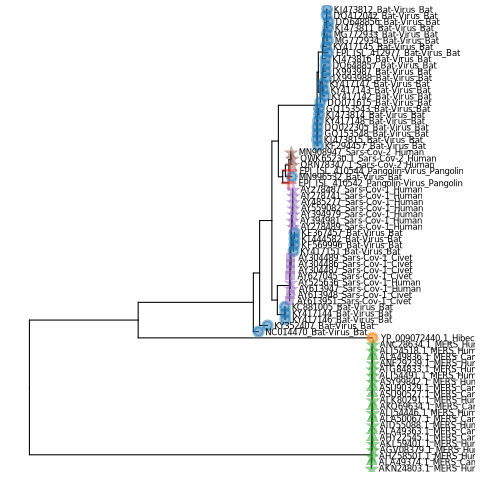

In [9]:
%%R

# Plot non circular tree
p <- ggtree(tree) %<+% tip_metadata +
  geom_tippoint(aes(color = color_group, shape = shape), size = 3, stroke = 2, alpha = 0.5) +
  geom_text(aes(label = star_label, color = color_group), size = 6, fontface = "bold", na.rm = TRUE, alpha = 0.5) +
  geom_tiplab(aes(label = label), hjust = -.05, size = 3 ) + # Adds Labels to tips
  xlim_tree(5.2) +
  scale_color_identity() + 
  scale_shape_identity() +  
  theme(text = element_text(family = "Arial Unicode MS"))


print(p)

ggsave("Full_Name_Tree.pdf", plot = p, width = 13, height = 18, dpi = 600, device = cairo_pdf)

[1] "Data"
[1] "category_to_ids"
$`-1`
[1] "MN996532"       "MN908947"       "QWK65230.1"     "EPI_ISL_410544"

$`0`
 [1] "ALA49363.1"     "ATG84833.1"     "ALA49374.1"     "AHZ58501.1"    
 [5] "ALA49836.1"     "ANF29239.1"     "AKO69634.1"     "ALJ54491.1"    
 [9] "ANC28634.1"     "AID55088.1"     "ALJ54446.1"     "ALA50067.1"    
[13] "ALK80291.1"     "AGV08379.1"     "ALJ54518.1"     "AHY22545.1"    
[17] "ASU90329.1"     "AKN24803.1"     "ASU90527.1"     "AKL59401.1"    
[21] "ASY99842.1"     "YP_009072440.1"

$`1`
 [1] "AY304486"       "AY304487"       "AY304489"       "AY613951"      
 [5] "AY613948"       "AY627045"       "AY278741"       "AY278489"      
 [9] "AY278487"       "AY394979"       "AY394981"       "AY485277"      
[13] "AY525636"       "AY559082"       "AY613947"       "QRN78347.1"    
[17] "EPI_ISL_410542"

$`2`
 [1] "MG772934"       "MG772933"       "KT444582"       "KY417146"      
 [5] "KF367457"       "KY417151"       "KY417144"       "KC881005"      
 [9] "K

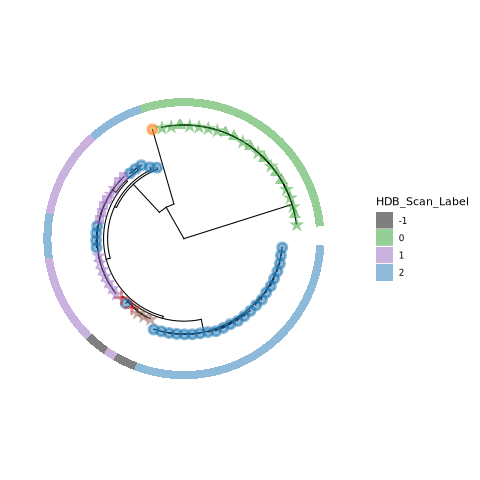

In [24]:
%%R

# Create circular tree for figure 4D with HDB Scan Label

library(ggtree)
library(ape)
library(dplyr)
library(stringr)
library(ggplot2)
library(ggtreeExtra)


# Load tree
tree <- read.tree(tree_path)

# Extract tip labels
tip_labels <- tree$tip.label

# Define the substrings that map to types
# Read the CSV file
data <- read.csv(hdb_scan_clusters, stringsAsFactors = FALSE)

print("Data")
head(data)

# Split the ids into a list by category in column C
category_to_ids <- split(data$SeqID, data$Cluster)

# Print the result
print("category_to_ids")
print(category_to_ids)

classify_type <- function(label) {
  for (name in names(category_to_ids)) {
    if (any(sapply(category_to_ids[[name]], function(item) grepl(item, label, ignore.case = TRUE, fixed = TRUE)))) {
      return(name)
    }
  }
  return(NA)  # or NULL, or "No match"
}

# Build metadata for each tip
tip_metadata <- data.frame(label = tip_labels) %>%
  mutate(

    # Assigns colors based on organism
    color_group = case_when(
      str_detect(label, "Hibecovirus") ~ "#ff7f0e",
      str_detect(label, "Pangolin") ~ "#d62728",
      str_detect(label, "MERS") ~ "#2ca02c",
      str_detect(label, "Bat-Virus") ~ "#1f77b4",
      str_detect(label, fixed("Sars-Cov-1")) ~ "#9467bd",
      str_detect(label, fixed("Sars-Cov-2")) ~ "#8c564b",
      TRUE ~ "gray"
    ),

    # Assigns the point shape string
    shape_group = case_when(
      str_detect(label, "Bat") ~ "circle",
      str_detect(label, "Camel") ~ "triangle",
      str_detect(label, "Civet") ~ "square",
      str_detect(label, "Pangolin") ~ "plus",
      TRUE ~ "star"
    ),

    # Assigns the point type number
    shape = case_when(
      shape_group == "square" ~ 15,    # square
      shape_group == "triangle" ~ 17,  # triangle
      shape_group == "circle" ~ 19,  # circle
      shape_group == "plus" ~ 3,  # plus
      TRUE ~ NA_real_                     # star
    ),

    # Add Unicode stars as text labels for star group
    star_label = ifelse(shape_group == "star", "\u2605", ""),

    # Assigns a cluster group from the Figure 4A
    HDB_Scan_Label = sapply(label, classify_type)
  )
  

print(tip_metadata)

# Plot circular tree
p <- ggtree(tree, layout = "circular") %<+% tip_metadata +
  geom_tippoint(aes(color = color_group, shape = shape), size = 3, stroke = 2, alpha = 0.5) +
  geom_text(aes(label = star_label, color = color_group), size = 6, fontface = "bold", na.rm = TRUE, alpha = 0.5) +
  geom_fruit(
    geom = geom_tile,
    mapping = aes(y = label, fill = HDB_Scan_Label),
    width = 0.3,
    offset = 0.2,
    alpha = 0.5
  ) +
  scale_fill_manual(values = c("-1" = "black", "0" = "#2ca02c", "1" = "#9467bd", "2" = "#1f77b4")) +
  scale_color_identity() + 
  scale_shape_identity() + 
  theme(text = element_text(family = "Arial Unicode MS"))


print(p)

ggsave("Circular_Tree_Extra_Annotation.pdf", plot = p, width = 10, height = 8, dpi = 600, device = cairo_pdf)

$`-1`
[1] "KT444582" "KY417146" "KF367457" "KY417151" "KC881005" "KF569996"

$`0`
 [1] "MG772934"       "MG772933"       "KY417142"       "KY417147"      
 [5] "KY417148"       "KY417143"       "DQ648857"       "DQ071615"      
 [9] "GQ153543"       "GQ153548"       "DQ022305"       "KF294457"      
[13] "KJ473815"       "JX993988"       "JX993987"       "KJ473814"      
[17] "KJ473816"       "KJ473811"       "DQ412042"       "DQ648856"      
[21] "KJ473812"       "KY417145"       "EPI_ISL_412977" "YP_009072440.1"

$`1`
 [1] "ALA49363.1" "ATG84833.1" "ALA49374.1" "AHZ58501.1" "ALA49836.1"
 [6] "ANF29239.1" "AKO69634.1" "ALJ54491.1" "ANC28634.1" "AID55088.1"
[11] "ALJ54446.1" "ALA50067.1" "ALK80291.1" "AGV08379.1" "ALJ54518.1"
[16] "AHY22545.1" "ASU90329.1" "AKN24803.1" "ASU90527.1" "AKL59401.1"
[21] "ASY99842.1"

$`2`
[1] "MN996532"       "KY417144"       "NC014470"       "KY352407"      
[5] "MN908947"       "QRN78347.1"     "QWK65230.1"     "EPI_ISL_410544"
[9] "EPI_ISL_410542"

$`3`

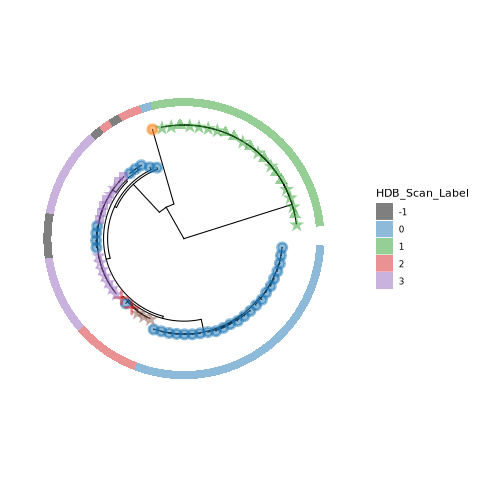

In [31]:
%%R

# Create circular tree for supplementry figure 4D, with non fine tuned annotations

library(ggtree)
library(ape)
library(dplyr)
library(stringr)
library(ggplot2)
library(ggtreeExtra)


# Load tree
tree <- read.tree(tree_path)

# Extract tip labels
tip_labels <- tree$tip.label

# Define the substrings that map to types
# Read the CSV file
data <- read.csv(hdb_scan_clusters_non_finetuned, stringsAsFactors = FALSE)

head(data)

# Split the ids into a list by category in column C
category_to_ids <- split(data$SeqID, data$Cluster)

# Print the result
print(category_to_ids)

classify_type <- function(label) {
  for (name in names(category_to_ids)) {
    if (any(sapply(category_to_ids[[name]], function(item) grepl(item, label, ignore.case = TRUE, fixed = TRUE)))) {
      return(name)
    }
  }
  return(NA)  # or NULL, or "No match"
}

# Build metadata for each tip
tip_metadata <- data.frame(label = tip_labels) %>%
  mutate(

    # Assigns colors based on organism
    color_group = case_when(
      str_detect(label, "Hibecovirus") ~ "#ff7f0e",
      str_detect(label, "Pangolin") ~ "#d62728",
      str_detect(label, "MERS") ~ "#2ca02c",
      str_detect(label, "Bat-Virus") ~ "#1f77b4",
      str_detect(label, fixed("Sars-Cov-1")) ~ "#9467bd",
      str_detect(label, fixed("Sars-Cov-2")) ~ "#8c564b",
      TRUE ~ "gray"
    ),

    # Assigns the point shape string
    shape_group = case_when(
      str_detect(label, "Bat") ~ "circle",
      str_detect(label, "Camel") ~ "triangle",
      str_detect(label, "Civet") ~ "square",
      str_detect(label, "Pangolin") ~ "plus",
      TRUE ~ "star"
    ),

    # Assigns the point type number
    shape = case_when(
      shape_group == "square" ~ 15,    # square
      shape_group == "triangle" ~ 17,  # triangle
      shape_group == "circle" ~ 19,  # circle
      shape_group == "plus" ~ 3,  # plus
      TRUE ~ NA_real_                     # star
    ),

    # Add Unicode stars as text labels for star group
    star_label = ifelse(shape_group == "star", "\u2605", ""),

    # Assigns a cluster group from the Figure 4A
    HDB_Scan_Label = sapply(label, classify_type)
  )
  

print(tip_metadata)

# Plot circular tree
p <- ggtree(tree, layout = "circular") %<+% tip_metadata +
  geom_tippoint(aes(color = color_group, shape = shape), size = 3, stroke = 2, alpha = 0.5) +
  geom_text(aes(label = star_label, color = color_group), size = 6, fontface = "bold", na.rm = TRUE, alpha = 0.5) +
  geom_fruit(
    geom = geom_tile,
    mapping = aes(y = label, fill = HDB_Scan_Label),
    width = 0.3,
    offset = 0.2,
    alpha = 0.5
  ) +
  scale_fill_manual(values = c("-1" = "black", "0" = "#1f77b4", "1" = "#2ca02c", "2" = "#d62728", "3" = "#9467bd")) +
  scale_color_identity() + 
  scale_shape_identity() + 
  theme(text = element_text(family = "Arial Unicode MS"))


print(p)

ggsave("Circular_Tree_Extra_Annotation_Non_Finetuned.pdf", plot = p, width = 10, height = 8, dpi = 600, device = cairo_pdf)